In [1]:
from vaeb import*

/home/yubaes/anaconda3/envs/DL/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

encoder = Model(data_dim=2, context_dim=img_size[0]*img_size[1], hidden_dim=200).to(device)
decoder = Model(data_dim=img_size[0]*img_size[1], context_dim=2, hidden_dim=200, constrain=True).to(device)
encoder_optimizer = torch.optim.Adagrad(encoder.parameters(), lr=0.01, weight_decay=0.5)
decoder_optimizer = torch.optim.Adagrad(decoder.parameters(), lr=0.01)
loss = train(encoder, decoder, encoder_optimizer, decoder_optimizer, 10**6)

100%|██████████| 1000000/1000000 [1:03:52<00:00, 260.89it/s]


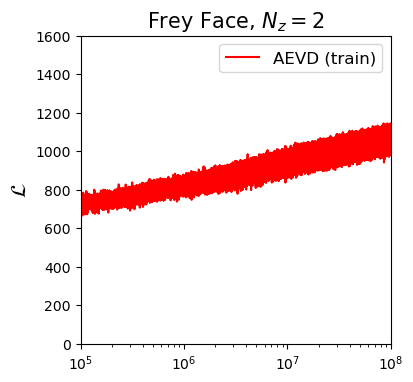

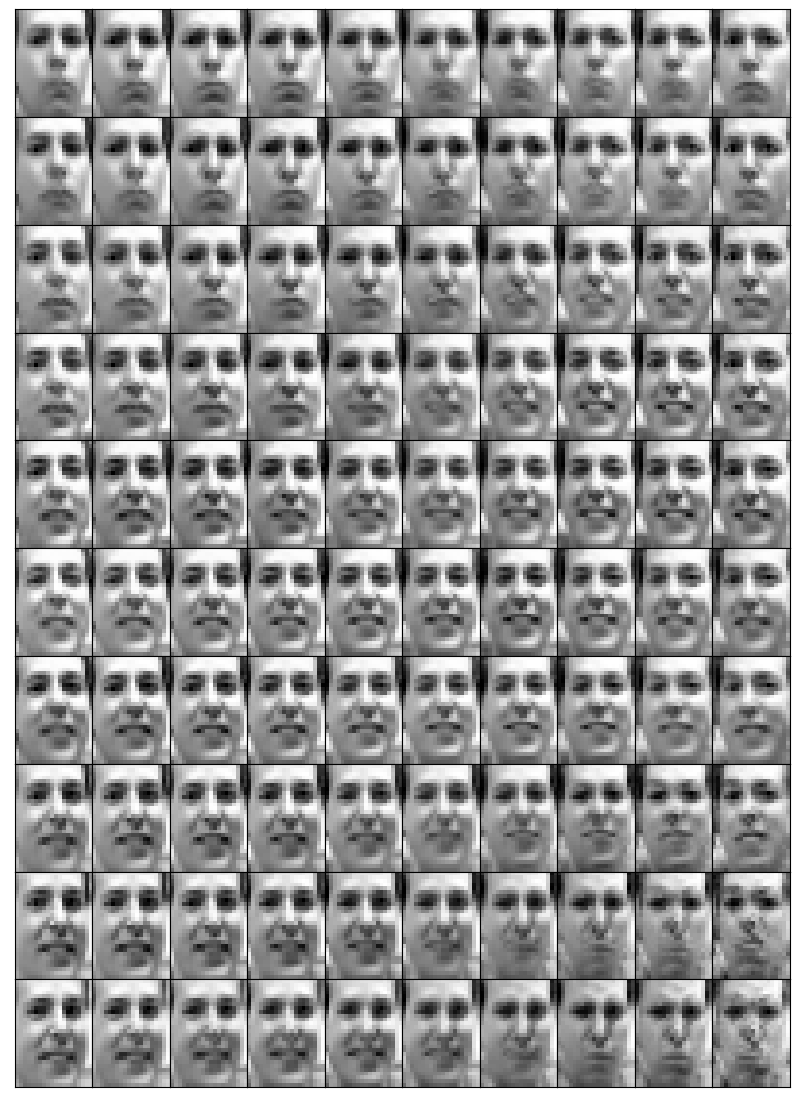

In [3]:
plt.figure(figsize=(4, 4))
plt.plot(100*np.arange(len(loss)), -np.array(loss), c='r', label='AEVD (train)')
plt.xscale('log')
plt.xlim([10**5, 10**8])
plt.ylim(0, 1600)
plt.title(r'Frey Face, $N_z = 2$', fontsize=15)
plt.ylabel(r'$\mathcal{L}$', fontsize=15)
plt.legend(fontsize=12)
plt.savefig('Imgs/Training_loss.png', bbox_inches="tight")
plt.show()
grid_size = 10
xx, yy = norm.ppf(np.meshgrid(np.linspace(0.1, .9, grid_size), np.linspace(0.1, .9, grid_size)))

fig = plt.figure(figsize=(10, 14), constrained_layout=False)
grid = fig.add_gridspec(grid_size, grid_size, wspace=0, hspace=0)

for i in range(grid_size):
    for j in range(grid_size):
        img = decoder.mean_log_var(torch.tensor([[xx[i, j], yy[i, j]]], device=device, dtype=torch.float))
        ax = fig.add_subplot(grid[i, j])
        ax.imshow(np.clip(img[0].data.cpu().numpy().reshape(img_size[0], img_size[1]), 0, 1), cmap='gray', aspect='auto')
        ax.set_xticks([])
        ax.set_yticks([])
plt.savefig('Imgs/Learned_data_manifold.png', bbox_inches="tight") 
plt.show()